<a href="https://colab.research.google.com/github/SleepyRizi/ANN-Notebooks/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/DeepLearning')

Mounted at /content/DeepLearning


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0][27]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
import matplotlib.pyplot as plt

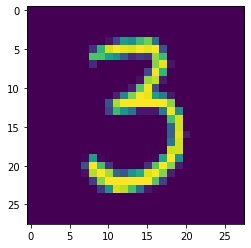

In [ ]:
plt.imshow(X_train[50])

In [ ]:
#dividing X_Train and X_Test with 255 to get values in range of 0-1
X_train= X_train/255
X_test= X_test/255

In [ ]:
X_train[32][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.21176471, 0.92156863, 0.8       ,
       0.02745098, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) #Flattening the layer 2D to 1D & input layer
model.add(Dense(128,activation="relu"))
model.add(Dense(130,activation='relu'))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 130)               16770     
                                                                 
 dense_4 (Dense)             (None, 10)                1310      
                                                                 
Total params: 118,560
Trainable params: 118,560
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2587 - accuracy: 0.9243 - val_loss: 0.1458 - val_accuracy: 0.9549
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1078 - accuracy: 0.9670 - val_loss: 0.0996 - val_accuracy: 0.9716
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0735 - accuracy: 0.9769 - val_loss: 0.0943 - val_accuracy: 0.9723
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0554 - accuracy: 0.9824 - val_loss: 0.0907 - val_accuracy: 0.9712
Epoch 5/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0414 - accuracy: 0.9865 - val_loss: 0.1177 - val_accuracy: 0.9702
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0349 - accuracy: 0.9879 - val_loss: 0.0881 - val_accuracy: 0.9769
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.1049 - val_accuracy:

In [ ]:
y_prob=model.predict(X_test)

In [ ]:
y_pred=y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred,y_test)

0.9764

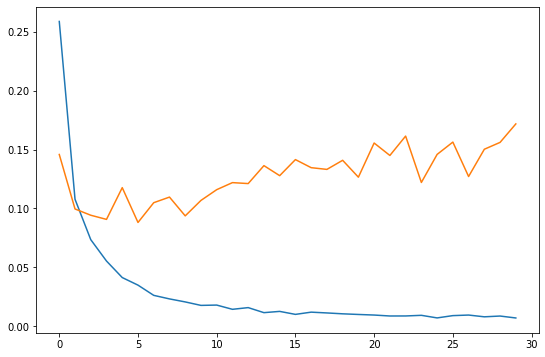

In [ ]:
plt.rcParams['figure.figsize']=9,6
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

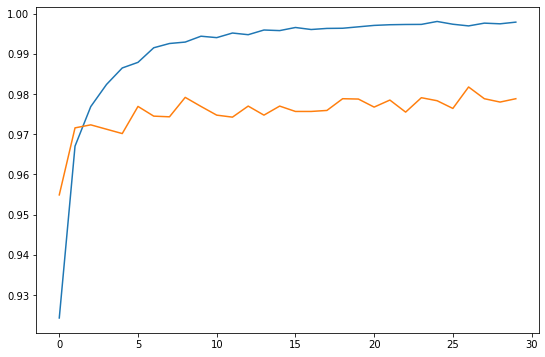

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

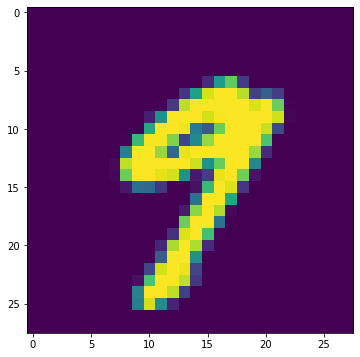

In [ ]:
plt.imshow(X_test[20])

In [ ]:
model.predict(X_test[20].reshape(1,28,28)).argmax(axis=1)

array([9])